In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
df = pd.read_csv(r'C:\Users\HP\ml_training\weatherAUS.csv')
df.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm'],axis = 1,inplace = True)
df.RainToday = [1 if i == 'Yes' else 0 for i in df.RainToday]
df.RainTomorrow = [1 if i == 'Yes' else 0 for i in df.RainTomorrow]
df.fillna(0, inplace=True)
df1 = df.drop(['RainTomorrow'],axis = 1)
y = df['RainTomorrow'].values
x = (df1 - np.min(df1)) / (np.max(df1) - np.min(df1))
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=90210)
kmeans = KMeans(n_clusters= 2,init = 'k-means++')
kmeans.fit(xtrain)




KMeans(n_clusters=2)

In [331]:
print(kmeans.cluster_centers_)

[[4.79789629e-01 5.41024386e-01 1.96244490e-04 2.30550092e-02
  2.94457974e-01 2.69155005e-01 1.03049167e-01 2.05965583e-01
  6.40743095e-01 4.59169397e-01 8.75947799e-01 8.75298548e-01
  2.64888433e-01 2.64148598e-01 5.11983116e-01 5.24875195e-01
  2.84217094e-14]
 [5.02838210e-01 4.71739769e-01 2.77488019e-02 1.55346073e-02
  1.92553074e-01 2.99680962e-01 1.19878156e-01 2.24322942e-01
  8.01333333e-01 6.41712555e-01 8.78338242e-01 8.78042956e-01
  4.41473199e-01 4.10275125e-01 4.83385081e-01 4.53824621e-01
  1.00000000e+00]]


In [332]:
kmeans_pred = kmeans.predict(xtest)

In [333]:
kmeans_pred_2 = []
for x in kmeans_pred:
    if x == 1:
        kmeans_pred_2.append(0)
    elif x == 0:
        kmeans_pred_2.append(1)
        
kmeans_pred_2 = np.array(kmeans_pred_2)

In [334]:
if accuracy_score(kmeans_pred,ytest, normalize=False) < accuracy_score(kmeans_pred_2, ytest, normalize=False):
    kmeans_pred = kmeans_pred_2

In [335]:

result_df = pd.DataFrame()
result_df['ytest'] = np.array(ytest)
result_df['kmeans_pred'] = kmeans_pred
result_df['kmeans_correct'] = result_df['kmeans_pred'] == result_df['ytest']

In [336]:
a = result_df['kmeans_correct'].values

In [337]:
count = 0
for i in a:
    if i == True:
        count+=1

In [338]:
print(count/len(a))

0.7627182200741636


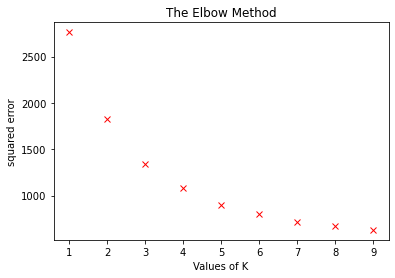

In [21]:
x1 = x[:5000]
y1 = y[:5000]
l = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x1)
    l.append(kmeans.inertia_)
    plt.plot(i, abs(l[i-1]), 'rx-')
    plt.xlabel('Values of K')
    plt.ylabel('squared error')
    plt.title('The Elbow Method')
